# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Polarizadores-cruzados-y-giramos-R2" data-toc-modified-id="Polarizadores-cruzados-y-giramos-R2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polarizadores cruzados y giramos R2</a></div><div class="lev2 toc-item"><a href="#Parte-experimental" data-toc-modified-id="Parte-experimental-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parte experimental</a></div><div class="lev2 toc-item"><a href="#Parte-numérica" data-toc-modified-id="Parte-numérica-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parte numérica</a></div><div class="lev2 toc-item"><a href="#Ajuste-sencillo" data-toc-modified-id="Ajuste-sencillo-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ajuste sencillo</a></div><div class="lev2 toc-item"><a href="#Definición-de-funcion-de-ajuste" data-toc-modified-id="Definición-de-funcion-de-ajuste-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Definición de funcion de ajuste</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---2:-completo" data-toc-modified-id="Fitting-to-matrices---2:-completo-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Fitting to matrices - 2: completo</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---2:-solo-angulos" data-toc-modified-id="Fitting-to-matrices---2:-solo-angulos-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Fitting to matrices - 2: solo angulos</a></div>

# Polarizadores cruzados y giramos R2

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   12/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1 Thorlabs LPNIRE100-B.
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP
1. Polarizador 4 Thorlabs LPNIRE100-B.




**Procedimiento**:

Se conocen los parámetros y ángulos de P1 y P4.

1. Se interpone la lámina retardadora R2

1. Se deja P1 y P4 curzados (0, 90 grados).

1. Se rota R2




In [1]:
from __future__ import print_function, division

# configuration
%load_ext autoreload
%autoreload 2
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:898: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)


In [2]:
# import modules
from phyton_optics import sp, plt, mm, um, nm, degrees, np
import phyton_optics.polarization_stokes as polarization
from phyton_optics.polarization_stokes import (
    intensity, polarized_light, polarizer_linear, quarter_waveplate, rotate_mueller, 
    diattenuating_retarder, retarder, vacuum)

from polarimeter.polarimeter import (get_polarimeter_parameters, polarimeter_matrices,
    rotate_polarimeter, polarimeter_matrix, get_light_parameters)
from polarimeter.utils import dibujar_2d_fitting, plot_experiment_residuals_1D
from scipy import sin, cos,pi
from scipy.io import savemat, loadmat
from scipy import optimize

import pprint 
np.set_printoptions(precision=4)
sp.set_printoptions(precision=4)

## Parte experimental

In [3]:
#Cargo datos experimentales

filename='test_2_R2_pol_cruzados2018-03-21.mat'
experimental_dict=loadmat(filename)

angles_2=experimental_dict['angle_2'].flatten()*degrees

print(angles_2.min(), angles_2.max())

0.0 6.28318530718


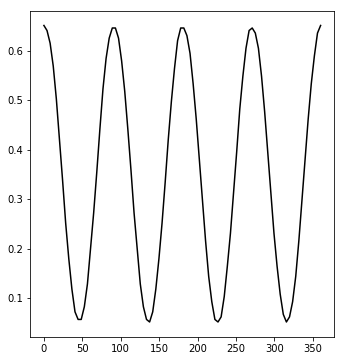

In [4]:
I_experimental=experimental_dict['intensities'].flatten()

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(angles_2/degrees,I_experimental,'k')

## Parte numérica

In [5]:
#Light source: circular polarization
param_u0, u0 =get_light_parameters()
[amplitude, angle, phase]=param_u0
print(u0)

[[ 3.5431]
 [-0.0246]
 [ 0.0126]
 [ 3.5429]]


In [6]:
pol_dicts=get_polarimeter_parameters(kind='real')
#real, ideal, exp
pol_dicts[1]['delta']=sp.pi/2
pprint.pprint(pol_dicts)


[{'p0': 0.128856857551, 'p1': 0.935181526985, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0.0},
 {'p0': 0.128856857551, 'p1': 0.935181526985, 'theta_axis': 0}]


In [7]:
is_polarizer=[True,True, False,True]

P = polarimeter_matrices(pol_dicts, angles=[0,0,0,0])
for i in range(len(P)):
    if is_polarizer[i] is True:
        pprint.pprint(P[i])


matrix([[ 0.4456,  0.429 ,  0.    ,  0.    ],
        [ 0.429 ,  0.4456,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.1205,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1205]])
matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]])
matrix([[ 0.4456,  0.429 ,  0.    ,  0.    ],
        [ 0.429 ,  0.4456,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.1205,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1205]])


0.248718490171


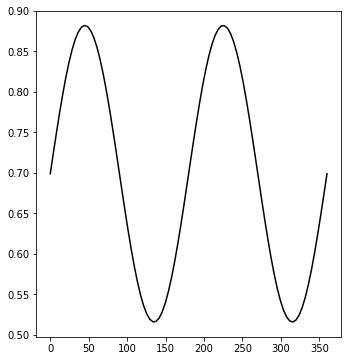

In [8]:
is_polarizer=[True,True, False,True]
I_numerica=sp.zeros_like(angles_2, dtype=float)

for i2, a2 in enumerate(angles_2):
        I_numerica[i2], M = polarimeter_matrix(P, is_present=is_polarizer, 
                                                 angles=[0,a2,0,90*degrees], u0=u0)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(angles_2/degrees,I_numerica,'k')

print(sp.std(abs(I_experimental-I_numerica)))


##  Ajuste sencillo

Definimos una función que genera la distribución de intensidad, que es la que intentamos optimizar, introducimos los parámetros que ya tenemos conocidos como valores fijos, no se optimizan.

## Definición de funcion de ajuste

In [9]:
[amplitude, angle, phase], u0= get_light_parameters()
print(u0)

[[ 3.5431]
 [-0.0246]
 [ 0.0126]
 [ 3.5429]]


In [10]:
pol_dicts =get_polarimeter_parameters(kind='real')
pol1,pol2,pol3,pol4 = pol_dicts

pprint.pprint(pol_dicts)

P1_0,P2_0,P3_0,P4_0=polarimeter_matrices(pol_dicts, angles=[0,0,0,0])
pprint.pprint(P1_0)

[{'p0': 0.128856857551, 'p1': 0.935181526985, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0.0},
 {'p0': 0.128856857551, 'p1': 0.935181526985, 'theta_axis': 0}]
matrix([[ 0.4456,  0.429 ,  0.    ,  0.    ],
        [ 0.429 ,  0.4456,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.1205,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1205]])


In [11]:
def get_intensity_numerical_simple(par_fitting, angles_2, u0):
    """
    par_fitting es sobre la lámina retardadora
    par_fitting = ( a, b, delta, angle_3)
    """
    a, b, delta, angle_2_pol = par_fitting
    a=1
    b=1
    
    is_polarizer=[True, True, False, True]
    
    P1=P1_0
    P2=diattenuating_retarder(p1=a, p2=b, phase=delta, theta=angle_2_pol)
    P4 =rotate_mueller(P4_0, 90*degrees)
         
    intensity_numerical=sp.zeros_like(angles_2, dtype=float)

    for i2, a2 in enumerate(angles_2):
            P2_r =rotate_mueller(P2, a2)
            intensity_numerical[i2]= intensity(P4*P2_r*P1*u0)
            
    return intensity_numerical

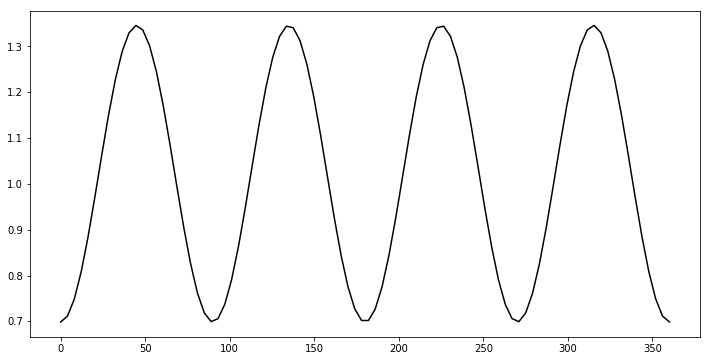

In [13]:
par_example=[1,1,180*degrees,90*degrees]
example=get_intensity_numerical_simple(par_example, angles_2, u0)

plt.figure(figsize=(12,6))
plt.plot(angles_2/degrees,example,'k')


In [14]:
def err_func(par_error, angles_2, u0,I_experimental):
    I_theory=get_intensity_numerical_simple(par_error, angles_2, u0)
    return (abs(I_theory -I_experimental ).flatten())

has_example=True
if has_example:
    par_example=[1,1, 90*degrees, 40*degrees]
    error=err_func(par_example, angles_2, u0,I_experimental)
    print(error.mean())

0.118129229012


In [15]:
err_func1 = lambda par, a2, u0, y: get_intensity_numerical_simple(par, a2, u0)- y
# Distance to the target function

In [16]:
params_1_ini = np.array([1,1,90*degrees,45*degrees]) # Initial guess for the parameters
params_1_fin, success = optimize.leastsq(err_func, params_1_ini, 
                                         args=(angles_2, u0, I_experimental))

In [17]:
print("a={}, b={}, \ndelta={}º, angle={}º".format(params_1_fin[0],params_1_fin[1],
                                              params_1_fin[2]/degrees, params_1_fin[3]/degrees))

a=1.0, b=1.0, 
delta=84.7307034197º, angle=43.9610310325º


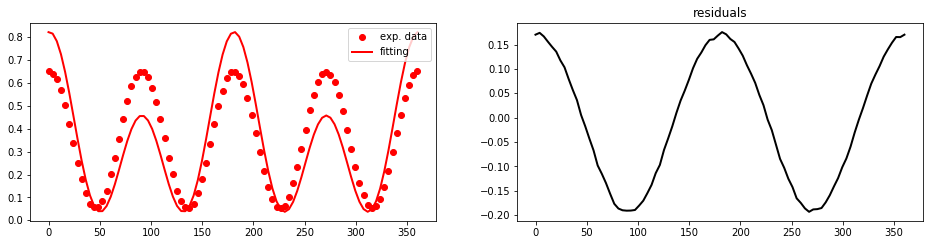

In [18]:
I_best=get_intensity_numerical_simple(params_1_fin, angles_2, u0)
plot_experiment_residuals_1D(angles_2,  I_experimental, I_best)


## Fitting to matrices - 2: completo


In [19]:
def get_intensity_numerical_all(par_fitting, angles_2, u0):
    """
    par_fitting son los parámetros de optimización, en este caso
        angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting
    """
    
    angle_1_pol, angle_2_pol, angle_4_pol, p1, p0, a, b, delta=par_fitting
    
    P1=polarizer_linear(p1=p1, p2=p0, theta=angle_1_pol)
    P2=diattenuating_retarder(p1=a, p2=b, phase=delta, theta=angle_2_pol)
    P4=polarizer_linear(p1=p1, p2=p0, theta=angle_4_pol)
    is_polarizer=[True, True, False, True]
    
    #P1=polarizer_linear(p1=pol1['p0'], p2=pol1['p1'], theta=pol1['theta_axis'])
  
    intensity_numerical=sp.zeros_like(angles_2, dtype=float)

    for i2, a2 in enumerate(angles_2):
        P2_r=rotate_mueller(P2,a2)
        intensity_numerical[i2]= intensity_numerical[i]=intensity(P4*P2_r*P1*u0)
            
    return intensity_numerical


In [20]:
def err_func2(par_error, angles_2, u0,I_experimental):
    I_theory=get_intensity_numerical_all(par_error, angles_2, u0)
    return (abs(I_theory -I_experimental).flatten())

has_example=True
if has_example:
    params_2_ini=np.array([6*degrees, 6*degrees, 39*degrees, 1,0, 1, 1, 90*degrees])
    error=err_func2(params_2_ini, angles_2, u0,I_experimental)
    print(error.mean())

0.535635982484


In [21]:
params_2_ini=np.array([0*degrees, 0*degrees, 90*degrees, 1,0, 1, 1, 90*degrees])

params_2_fin, success = optimize.leastsq(err_func2, params_2_ini,args=(angles_2, u0, I_experimental))


In [22]:
#  angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting

print("p0={}, p1={}".format(params_2_fin[4],params_2_fin[3]))
print("a={}, b={}, delta={}".format(params_2_fin[5],
                                     params_2_fin[6],
                                     params_2_fin[7]/degrees))

print("theta_1={}, theta_2={}, theta_4={}".format(params_2_fin[0]/degrees, 
                                                  params_2_fin[1]/degrees, 
                                                  params_2_fin[2]/degrees))

print(params_2_fin)

p0=-7.4390784041e-05, p1=0.705191743836
a=-1.22652128682, b=-1.22912174095, delta=136.631686202
theta_1=32246.6041792, theta_2=36.0572707786, theta_4=48.423310525
[ 562.8094    0.6293    0.8451    0.7052   -0.0001   -1.2265   -1.2291
    2.3847]


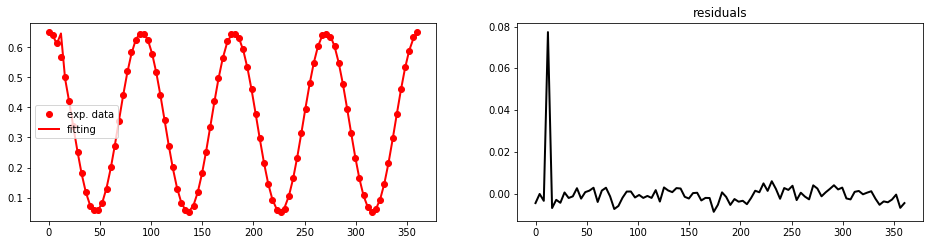

In [23]:
I_best2=get_intensity_numerical_all(params_2_fin, angles_2, u0)
plot_experiment_residuals_1D(angles_2, I_experimental, I_best2)

## Fitting to matrices - 2: solo angulos


In [24]:
p1,p2,p3,p4=pol_dicts
pprint.pprint(pol_dicts)

[{'p0': 0.128856857551, 'p1': 0.935181526985, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0.0},
 {'p0': 0.128856857551, 'p1': 0.935181526985, 'theta_axis': 0}]


In [45]:
def get_intensity_numerical_angulos(par_fitting, angles_2, u0):
    """
    par_fitting son los parámetros de optimización, en este caso
        angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting
    """
    
    angle_1_pol, angle_2_pol, angle_4_pol=par_fitting
  
    P1=polarizer_linear(p1=1, p2=0, theta=angle_1_pol)
    P2=diattenuating_retarder(p1=.9, p2=.9, phase=90*degrees, theta=angle_2_pol)
    P4=polarizer_linear(p1=1, p2=0, theta=angle_4_pol)
    is_polarizer=[True, True, False, True]
     
    intensity_numerical=sp.zeros_like(angles_2, dtype=float)
    for i2, a2 in enumerate(angles_2):
        P2_r =rotate_mueller(P2, a2)
        intensity_numerical[i2]= intensity_numerical[i]=intensity(P4*P2_r*P1*u0)
            
    return intensity_numerical

In [46]:
def err_func3(par_error, angles_2, u0,I_experimental):
    I_theory=get_intensity_numerical_angulos(par_error, angles_2, u0)
    return (I_theory -I_experimental).flatten()

has_example=True
if has_example:
    params_3_ini=np.array([0*degrees, 0*degrees, 90*degrees])
    error=err_func3(params_3_ini, angles_2, u0,I_experimental)
    print(error.mean())

0.357160152118


In [47]:
params_3_ini=np.array([0*degrees, 45*degrees, 90*degrees])

params_3_fin, success = optimize.leastsq(err_func3, params_3_ini,args=(angles_2, u0, I_experimental))

In [48]:
print("theta_1={:4.6}, theta_2={:4.6}, theta_4={:4.6}".format(params_3_fin[0]/degrees, 
                                                  params_3_fin[1]/degrees, 
                                                  params_3_fin[2]/degrees))



theta_1=0.84216, theta_2=44.9457, theta_4=91.1665


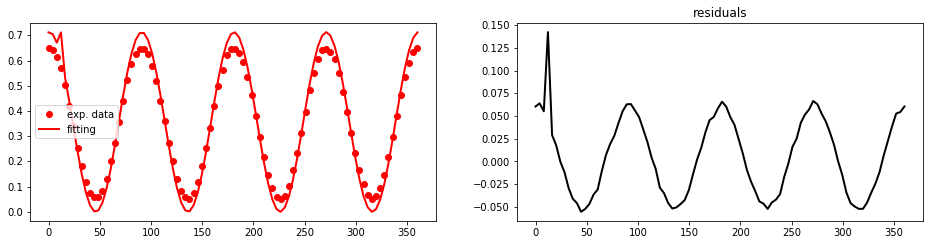

In [49]:
I_best3=get_intensity_numerical_angulos(params_3_fin, angles_2, u0)
plot_experiment_residuals_1D(angles_2, I_experimental, I_best3)